# Entrega 2

## Variables aleatorias continuas

### Definiciones

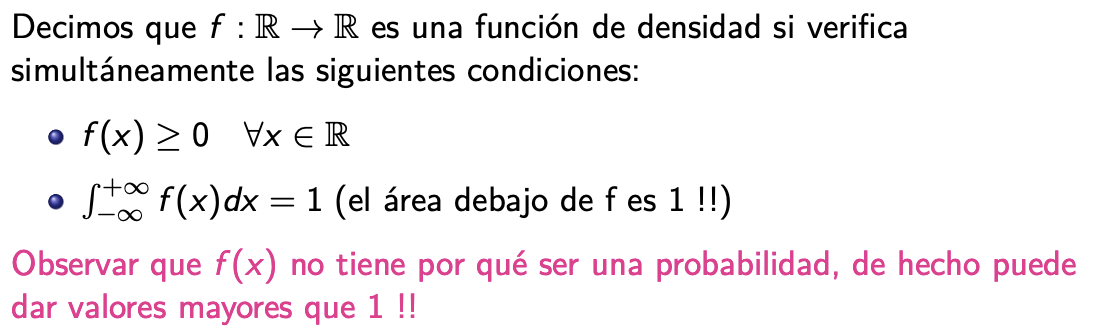

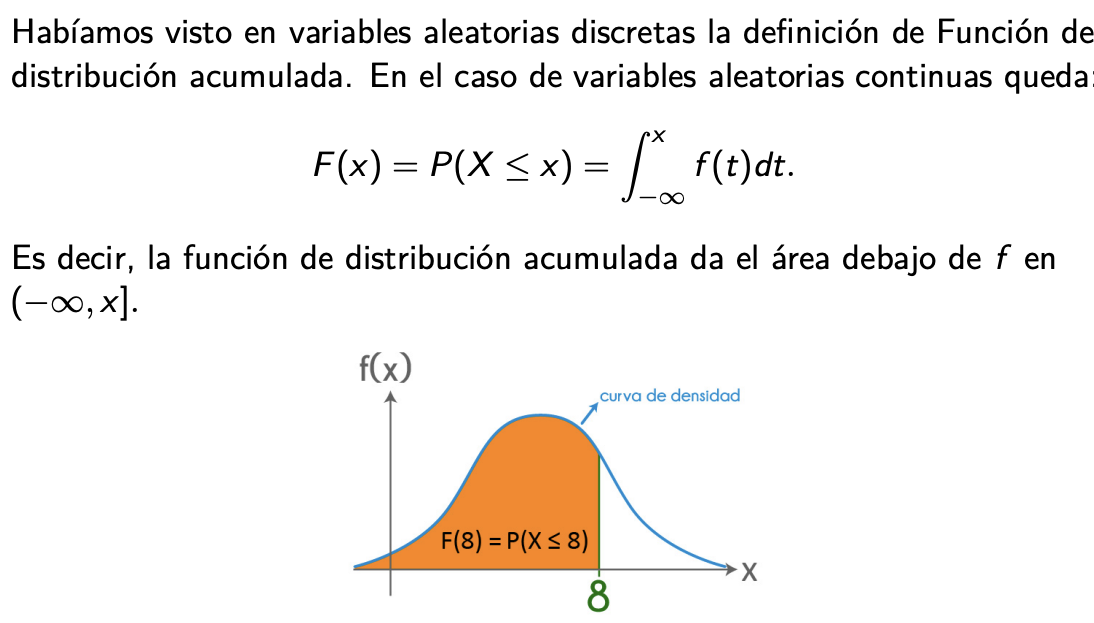

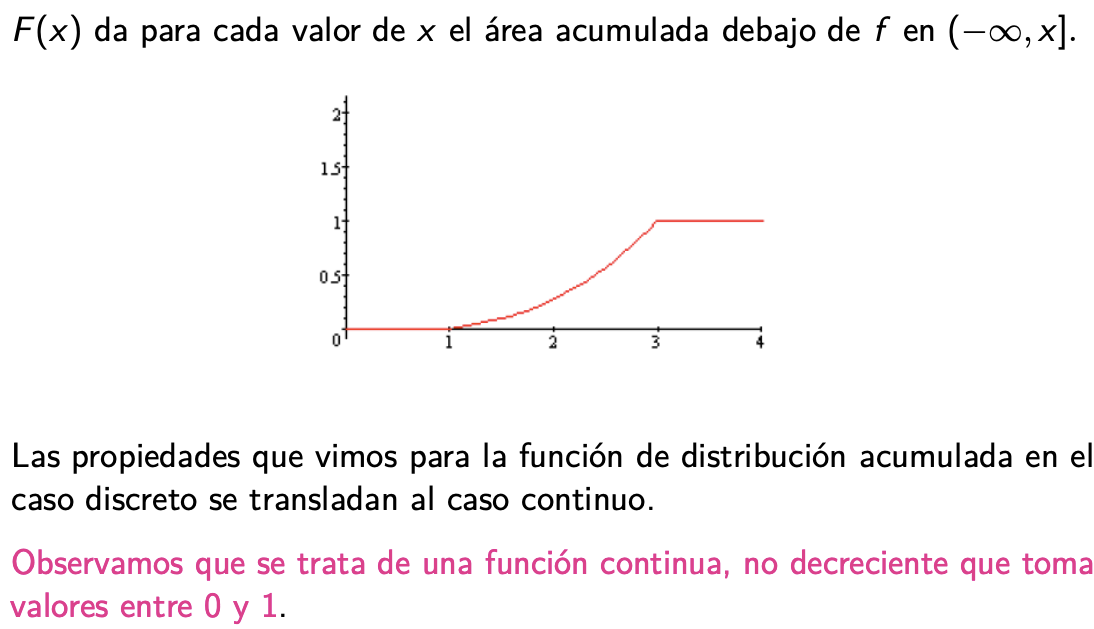

### Esperanza de variables aleatorias continuas

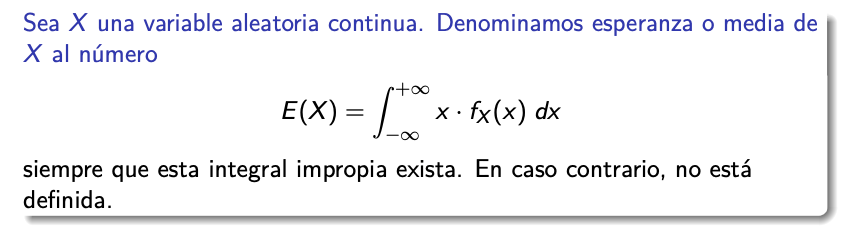

#### Esperanza de funciones de VA

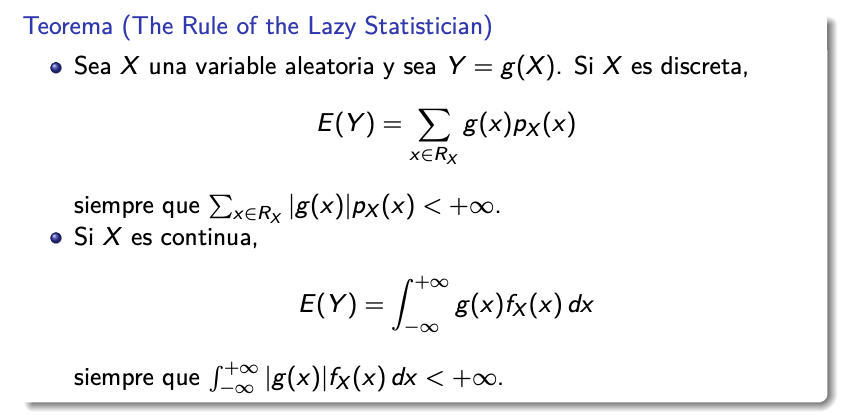

#### Propiedades de la esperanza

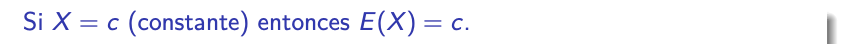

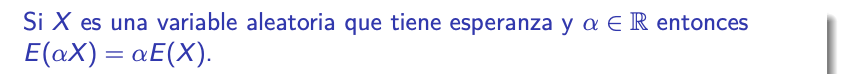

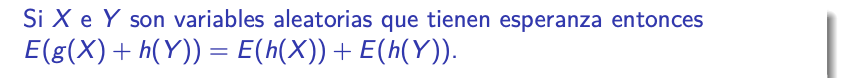

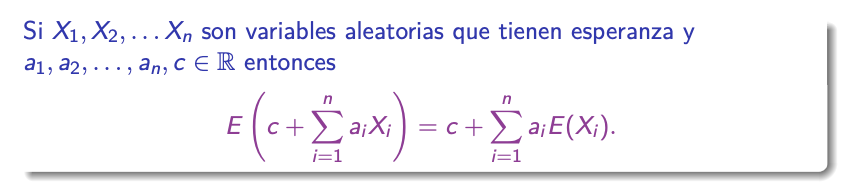

### Varianza de variables aleatorias continuas

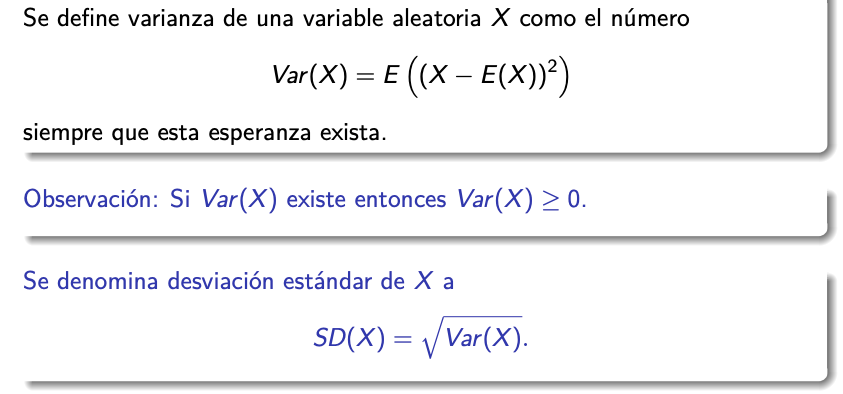

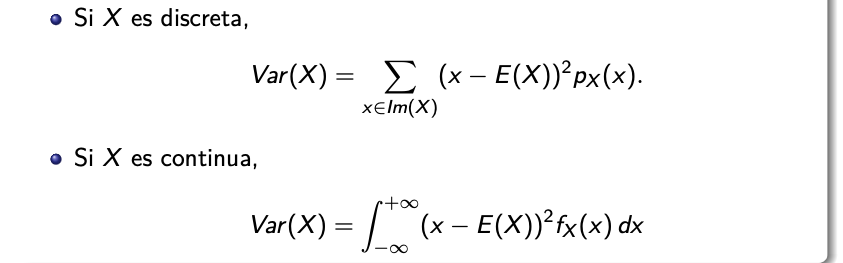

#### Formula práctica

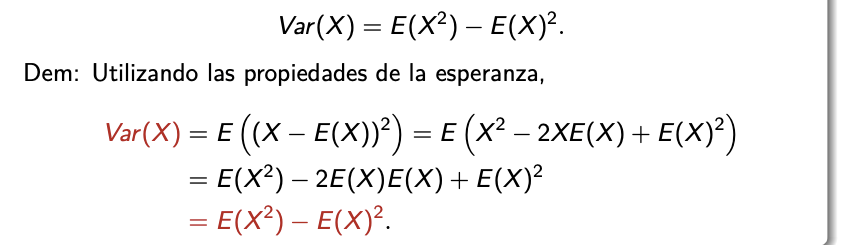

#### Propiedades

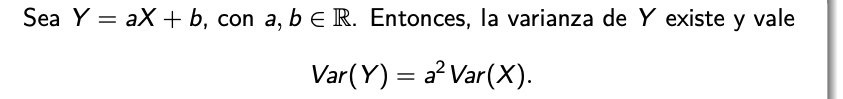

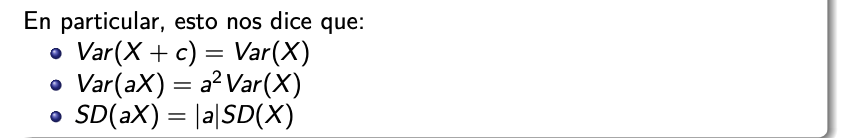

### Tabla esperanzas y varianzas

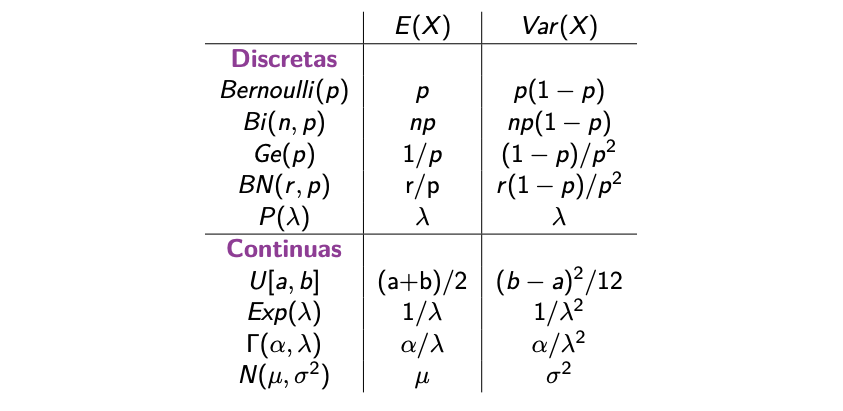

### Tabla distribuciones

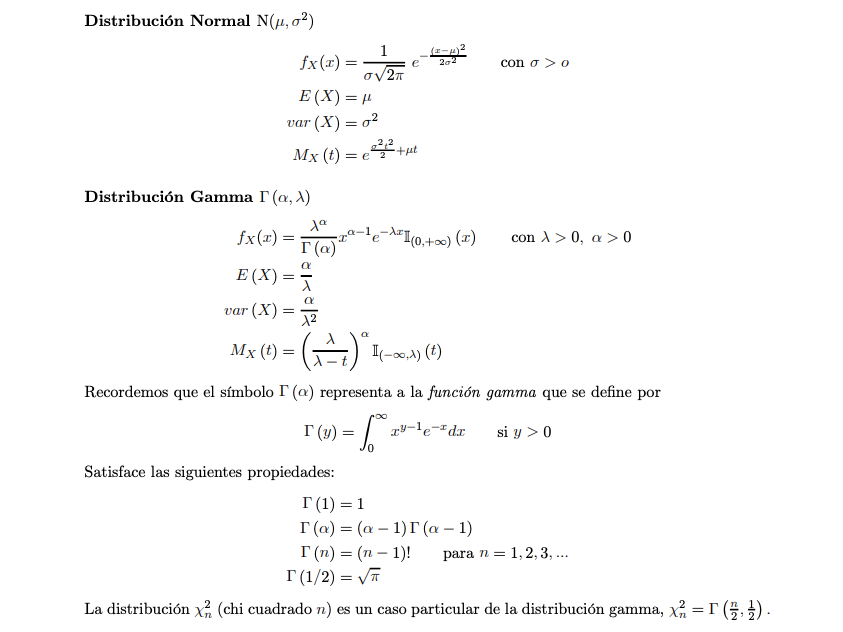

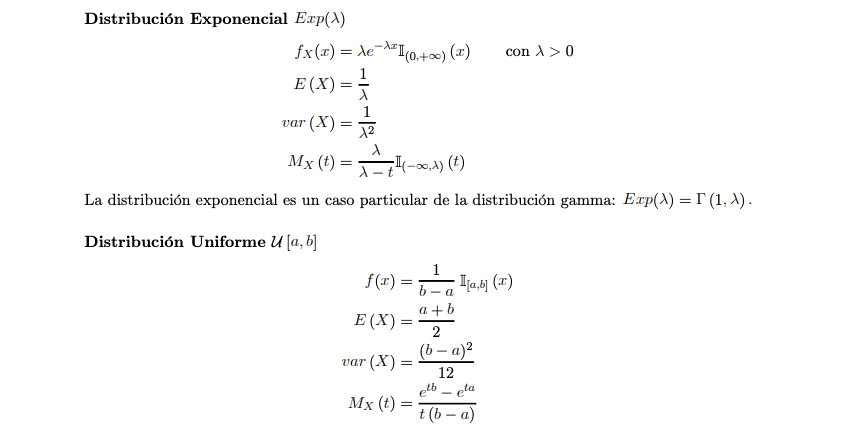

### Variables aleatorias continuas en scipy

* Uniforme: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform
* Exponential: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.expon.html#scipy.stats.expon
* Gamma: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma
* Normal: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html#scipy.stats.norm

## Vectores aleatorios

### Definiciones

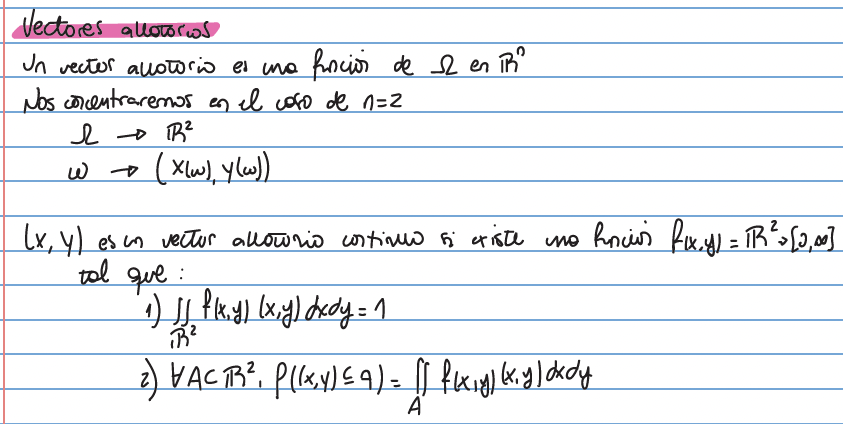

#### Marginales

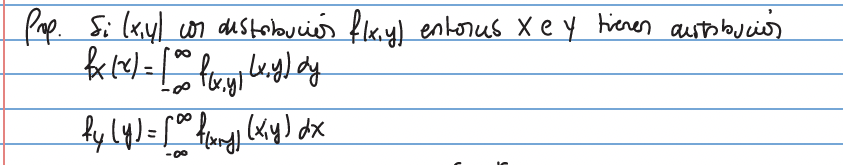

## Code examples

In [2]:
import scipy.stats
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import math

### Prueba de densidad

Ejemplo. Sea X una v.a. con función de densidad

$
\begin{equation}
f_X (x) = \begin{cases}
      0,75(1-x^2) & -1 \leq x \leq 1\\
      0 & \text{en otro caso}\\
    \end{cases}       
\end{equation}$

In [3]:
def f(x):
    if -1 <= x <= 1:
        return 0.75 * (1-x**2)
    else:
        return 0

In [4]:
# Toma una funcion "f" y devuelve True si "f" es una función de densidad
def is_densidad(f):
    if scipy.integrate.quad(f, -np.inf, np.inf)[0] == 1:
        return True
    else:
        return False

In [5]:
is_densidad(f)

True

### Integrar en (a,b)

In [6]:
# Función para integrar en (a,b)
a = -np.inf
b = np.inf
scipy.integrate.quad(f, a, b)[0]

1.0

### Probabilidad P(a < X < b)

In [7]:
def proba_en(f,a=-np.inf,b=np.inf):
    return scipy.integrate.quad(f, a, b)[0]

### Normal en (desde, hasta)

In [8]:
# Area debajo de la curva en (desde, hasta) de una N(mu, ds)
def norm_rango(mu=0, ds=1, desde=-np.inf, hasta=np.inf):
    va = scipy.stats.norm(mu, ds)
    return va.cdf(hasta) - va.cdf(desde)

### Variables conocidas

In [9]:
# Uniforme
desde = 0
hasta = 1
va = scipy.stats.uniform(desde, hasta-desde)
x = 0.21
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.21

In [10]:
# Exponencial
lam = 10
va = scipy.stats.expon(scale = 1/lam)
x = 0.21
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.877543571747018

In [11]:
# Gamma
alfa = 15
beta = 10
va = scipy.stats.gamma(a = alfa, scale = 1 / beta)
x = 2
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.8951357188920153

In [12]:
# Normal
mu = 0
varianza = 1
va = scipy.stats.norm(loc=mu, scale=math.sqrt(varianza))
x = 3
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.9986501019683699

In [13]:
va.ppf(0.998650101968) # me da el valor para el cual la variable tiene esa proba

2.999999999916528

## Gráficos

Text(0.5, 1.0, 'Distribución')

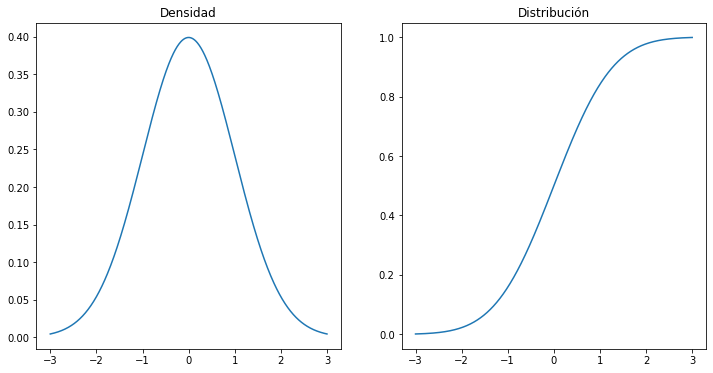

In [14]:
# Plot de densidad y distribución

# Densidad
n = -3
xs = []
ys = []
while n <= 3:
    xs.append(n)
    ys.append(va.pdf(n))
    n += 0.01

fig, (c1, c2) = plt.subplots(1,2, figsize=(12,6))
c1.plot(xs, ys)
c1.set_title("Densidad")

# Distribución
n = -3
xs = []
ys = []
while n <= 3:
    xs.append(n)
    ys.append(va.cdf(n))
    n += 0.01
    
c2.plot(xs, ys)
c2.set_title("Distribución")

## Entrega 2. Resolución

Ejercicio 1

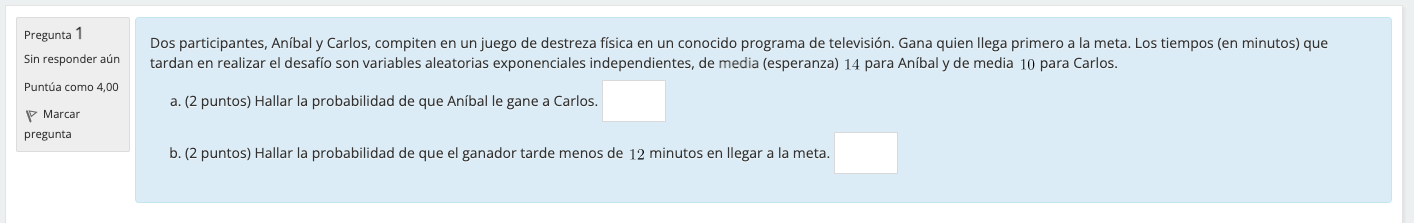

In [15]:
# Exponencial

# Tiene una esperanza de 14 = 1/lambda. Luego lambda = 1/14
lam = 1/14
anibal = scipy.stats.expon(scale = 1/lam)

In [16]:
lam = 1/10
carlos = scipy.stats.expon(scale = 1/lam)

In [17]:
anibal.cdf(np.inf)

1.0

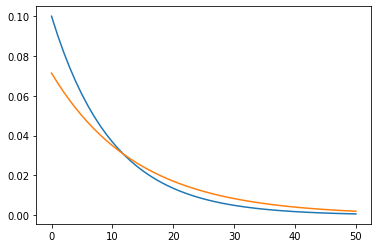

In [18]:
# Densidad
n = 0
xs_A = []
ys_A = []
while n <= 50:
    xs_A.append(n)
    ys_A.append(anibal.pdf(n))
    n += 1

n = 0
xs_B = []
ys_B = []
while n <= 50:
    xs_B.append(n)
    ys_B.append(carlos.pdf(n))
    n += 1
    
plt.plot(xs_B, ys_B)
plt.plot(xs_A, ys_A)



In [19]:
anibal.cdf(11.79) == carlos.cdf(11.79)

False

In [20]:
n = 10
while abs(anibal.pdf(n) - carlos.pdf(n)) > 0.0000001:
    n += 0.01
    n = round(n,2)
    if(n == 20):
        print("no se encontro")
        break
print(n)

no se encontro
20.0


In [21]:
anibal.pdf(12)

0.030312346119782143

In [22]:
carlos.pdf(12)

0.030119421191220214

In [23]:
# Puse esta en las dos
anibal.cdf(12)

0.57562715432305

Ejercicio 2

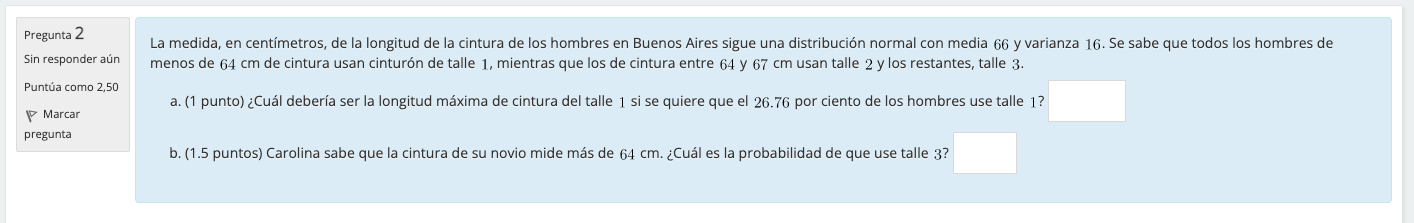

In [24]:
# a
mu = 66
varianza = 16
va = scipy.stats.norm(loc=mu, scale=math.sqrt(varianza))
n = 0.2676
va.ppf(n)

63.519648898383

In [25]:
(1-va.cdf(67)) / (1-va.cdf(64))

0.5803549676112517

Ejercicio 3

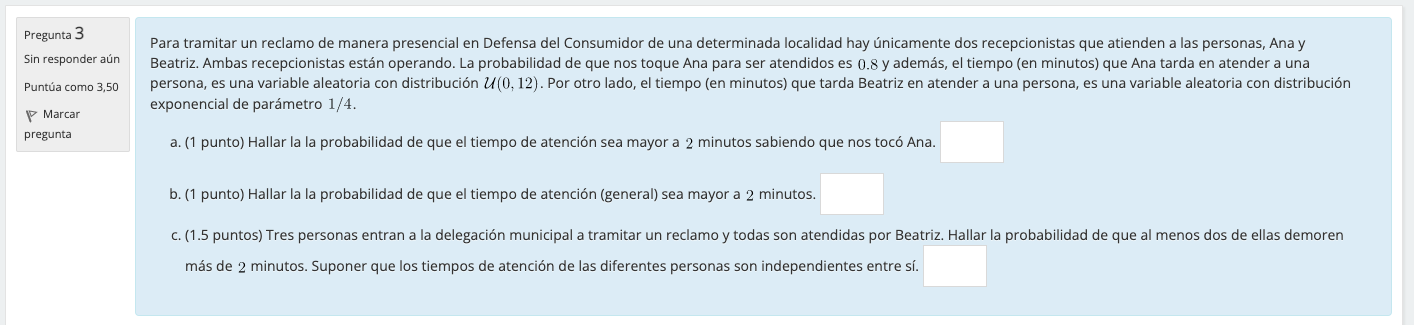

In [26]:
desde = 0
hasta = 12
ana = scipy.stats.uniform(desde, hasta)

In [27]:
p2_dado_ana = 1-ana.cdf(2)
p2_dado_ana

0.8333333333333334

In [28]:
lam = 1/4
beatriz = scipy.stats.expon(scale = 1/lam)
p2_dado_beatriz = 1-beatriz.cdf(2)
p2_dado_beatriz

0.6065306597126334

In [29]:
p2_dado_ana * 0.8 + p2_dado_beatriz * 0.2

0.7879727986091934

In [30]:
# C
n = 3
p = p2_dado_beatriz
va = scipy.stats.binom(n=n,p=p)
1 - va.pmf(0) - va.pmf(1)

0.6573780032174672

In [31]:
1 - va.cdf(1)

0.6573780032174673